## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).


In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

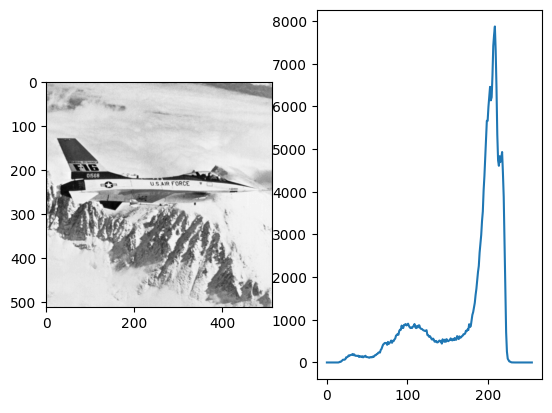

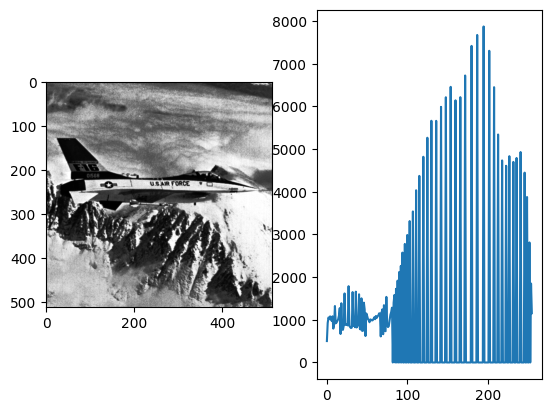

In [2]:
# lightness changes + contrast improves
img = cv2.imread('jet.bmp', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, 'gray')
axs[1].plot(hist)
plt.show()

cv2.equalizeHist(img, img)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, 'gray')
axs[1].plot(hist)
plt.show()

3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Na koniec należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

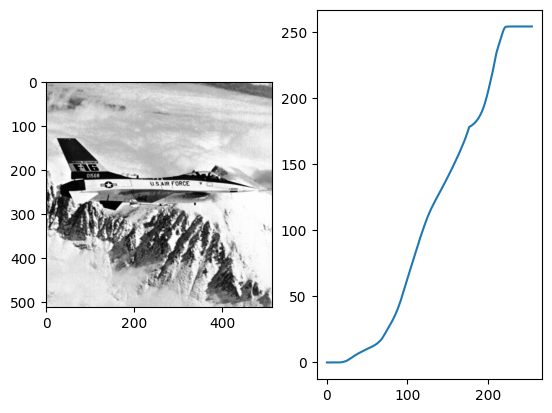

In [3]:
# BBHE
img = cv2.imread('jet.bmp', cv2.IMREAD_GRAYSCALE)

# próg podziału histogramu
bbhe_mean = round(np.mean(img))  # 178

# podzial histogramu na 2
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist1 = hist[0:bbhe_mean]
hist2 = hist[bbhe_mean:256]

# skumulowany + normalizacja i skalowanie + łączenie
hist1_cum = hist1.cumsum()
hist2_cum = hist2.cumsum()
hist1_cum = hist1_cum / hist1_cum.max()
hist2_cum = hist2_cum / hist2_cum.max()
hist1_cum = bbhe_mean * hist1_cum
hist2_cum = bbhe_mean + (255 - bbhe_mean - 1) * hist2_cum
hist_final = np.concatenate((hist1_cum, hist2_cum))

# lut
img = cv2.LUT(img, hist_final.astype('uint8'))

# plot
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, 'gray')
axs[1].plot(hist_final)
plt.show()